## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
   
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64], kernel_regularizer=l2(1e-4)):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=kernel_regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=kernel_regularizer)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

Using TensorFlow backend.


In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 1
REGULARIZERS = {
    'l1 (0.01)': l1(1e-2),
    'l1 (0.0001)': l1(1e-4),
    'l2 (0.01)': l2(1e-2),
    'l2 (0.0001)': l2(1e-4),
    'l1_l2 (0.01)': l1_l2(1e-2),
    'l1_l2 (0.0001)': l1_l2(1e-4),
}

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for key in REGULARIZERS.keys():
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with %s" % (key))
    model = build_mlp(input_shape=x_train.shape[1:], kernel_regularizer=REGULARIZERS[key])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-%s" % str(key)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0728 00:21:55.705910 36188 deprecation.py:506] From D:\python\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Experiment with l1 (0.01)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Experiment with l1 (0.0001)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 77us/sample - loss: 9.4179 - acc: 0.1556 - val_loss: 9.0727 - val_acc: 0.2210
Epoch 2/50
50000/50000 [==============================] - 3s 68us/sample - loss: 8.5469 - acc: 0.2750 - val_loss: 7.9373 - val_acc: 0.3071
Epoch 3/50
50000/50000 [==============================] - 3s 68us/sample - loss: 7.2576 - acc: 0.3180 - val_loss: 6.5096 - val_acc: 0.3341
Epoch 4/50
50000/50000 [==============================] - 4s 85us/sample - loss: 5.7631 - acc: 0.3419 - val_loss: 4.9617 - val_acc: 0.3574
Epoch 5/50
50000/50000 [==============================] - 4s 79us/sample - loss: 4.2609 - acc: 0.3471 - val_loss: 3.5781 - val_acc: 0.3512
Epoch 6/50
50000/50000 [==============================] - 4s 82us/sample - loss: 3.0654 - acc: 0.3499 - val_loss: 2.6177 - val_acc: 0.3523
Epoch 7/50
50000/50000 [==============================] - 4s 75us/sample - loss: 2.3683 - acc: 0.3533 - val_loss: 2.

50000/50000 [==============================] - 4s 75us/sample - loss: 2.2587 - acc: 0.1936 - val_loss: 2.1080 - val_acc: 0.2585
Epoch 2/50
50000/50000 [==============================] - 3s 65us/sample - loss: 2.0342 - acc: 0.2890 - val_loss: 1.9868 - val_acc: 0.3226
Epoch 3/50
50000/50000 [==============================] - 3s 66us/sample - loss: 1.9607 - acc: 0.3337 - val_loss: 1.9386 - val_acc: 0.3382
Epoch 4/50
50000/50000 [==============================] - 4s 72us/sample - loss: 1.9085 - acc: 0.3495 - val_loss: 1.9005 - val_acc: 0.3540
Epoch 5/50
50000/50000 [==============================] - 3s 65us/sample - loss: 1.8967 - acc: 0.3526 - val_loss: 1.8902 - val_acc: 0.3466
Epoch 6/50
50000/50000 [==============================] - 3s 66us/sample - loss: 1.9042 - acc: 0.3569 - val_loss: 1.8214 - val_acc: 0.3880
Epoch 7/50
50000/50000 [==============================] - 4s 78us/sample - loss: 1.8030 - acc: 0.3915 - val_loss: 1.7999 - val_acc: 0.3936
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 3s 67us/sample - loss: 80.5954 - acc: 0.2123 - val_loss: 102.9920 - val_acc: 0.2055
Epoch 3/50
50000/50000 [==============================] - 3s 67us/sample - loss: 135.1738 - acc: 0.1765 - val_loss: 152.3156 - val_acc: 0.1627
Epoch 4/50
50000/50000 [==============================] - 4s 75us/sample - loss: 143.6031 - acc: 0.1948 - val_loss: 125.5624 - val_acc: 0.2322
Epoch 5/50
50000/50000 [==============================] - 3s 66us/sample - loss: 107.9852 - acc: 0.2459 - val_loss: 99.8135 - val_acc: 0.2662
Epoch 6/50
50000/50000 [==============================] - 3s 67us/sample - loss: 120.4957 - acc: 0.2880 - val_loss: 139.3403 - val_acc: 0.3075
Epoch 7/50
50000/50000 [==============================] - 3s 67us/sample - loss: 136.3782 - acc: 0.3087 - val_loss: 125.2663 - val_acc: 0.3180
Epoch 8/50
50000/50000 [==============================] - 4s 72us/sample - loss: 108.9447 - acc: 0.3025 - val_loss: 94.4064 - val_acc: 0.2886
Ep

Epoch 2/50
50000/50000 [==============================] - 4s 77us/sample - loss: 10.3001 - acc: 0.2605 - val_loss: 9.5102 - val_acc: 0.2951
Epoch 3/50
50000/50000 [==============================] - 3s 69us/sample - loss: 8.6347 - acc: 0.3062 - val_loss: 7.6658 - val_acc: 0.3209
Epoch 4/50
50000/50000 [==============================] - 4s 74us/sample - loss: 6.6852 - acc: 0.3332 - val_loss: 5.6723 - val_acc: 0.3433
Epoch 5/50
50000/50000 [==============================] - 4s 71us/sample - loss: 4.7576 - acc: 0.3455 - val_loss: 3.8812 - val_acc: 0.3397
Epoch 6/50
50000/50000 [==============================] - 3s 68us/sample - loss: 3.2545 - acc: 0.3478 - val_loss: 2.7447 - val_acc: 0.3382
Epoch 7/50
50000/50000 [==============================] - 3s 61us/sample - loss: 2.6015 - acc: 0.3472 - val_loss: 2.6851 - val_acc: 0.3456
Epoch 8/50
50000/50000 [==============================] - 3s 59us/sample - loss: 3.1480 - acc: 0.3464 - val_loss: 3.7501 - val_acc: 0.3549
Epoch 9/50
50000/50000 [==

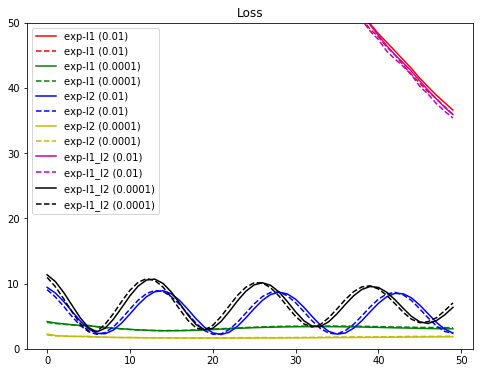

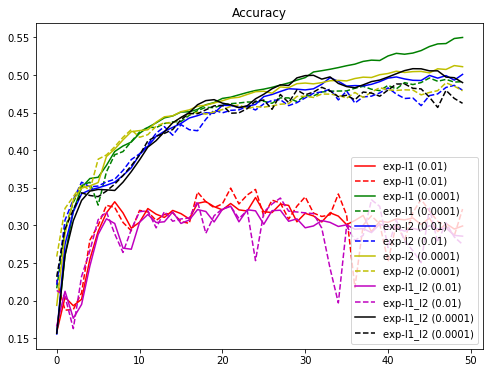

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 50])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()